In [2]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import GoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict


In [9]:
load_dotenv()
model=GoogleGenerativeAI(model='gemini-2.5-flash')

In [10]:
#state
class BlogState(TypedDict):

    title:str
    outline:str
    content:str

In [5]:
def create_outline(state: BlogState)-> BlogState:
    #fetch title
     title=state['title']
    #call llm generation
     prompt=f'Generate an outline for a blog on the topic-{title} '
     outline=model.invoke(prompt)
    #update state
     state['outline']=outline

     return state


In [6]:
def create_blog(state:BlogState)-> BlogState:
#fetch title & outline
   title=state['title']
   outline=state['outline']

   prompt=f'write a detail blog on the title -{title} using the following outline \n{outline}'
   content=model.invoke(prompt)

#update the state of content
   state['content']=content

   return state



In [7]:
graph=StateGraph(BlogState)

#nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)


#edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

workflow=graph.compile()



In [11]:
initial_state={'title':'Rise of AI in india'}
final_state=workflow.invoke(initial_state)
print(final_state)

{'title': 'Rise of AI in india', 'outline': 'Here\'s a comprehensive outline for a blog post on "The Rise of AI in India," designed to be engaging, informative, and well-structured:\n\n---\n\n## Blog Title Options:\n\n*   **India\'s AI Ascent: Unpacking the Revolution Transforming the Nation**\n*   **The AI Tsunami: How India is Riding the Wave of Artificial Intelligence**\n*   **From Code to Culture: The Rapid Rise of AI in India**\n*   **Beyond the Hype: Understanding India\'s Growing AI Footprint**\n\n---\n\n## Blog Outline: India\'s AI Ascent\n\n### I. Introduction: Setting the Stage for an AI Revolution\n\n*   **A. The Global AI Buzz:** Briefly touch upon the worldwide excitement and transformative potential of AI.\n*   **B. India\'s Unique Position:** Highlight why India is particularly interesting in the AI landscape – large talent pool, digital adoption, diverse challenges.\n*   **C. Thesis Statement:** India is rapidly emerging as a significant player in the global AI arena, n

In [12]:
final_state['content']

'## India\'s AI Ascent: Unpacking the Revolution Transforming the Nation\n\nFrom the bustling streets of Mumbai to the innovative tech hubs of Bengaluru, a silent yet profound revolution is underway. Artificial Intelligence (AI), once a futuristic concept, is rapidly integrating into the fabric of Indian society, promising to reshape industries, empower communities, and solve some of the nation\'s most pressing challenges. The global AI buzz is undeniable, with its transformative potential capturing the imagination of researchers, entrepreneurs, and governments worldwide. But India, with its vast talent pool, burgeoning digital adoption, and diverse socio-economic landscape, presents a particularly fascinating case study in this global narrative.\n\nIndia is rapidly emerging as a significant player in the global AI arena, not just adopting but actively shaping AI solutions for its unique context and beyond, promising profound economic and social impact. This blog will delve into the po

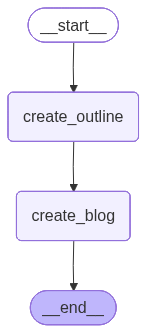

In [13]:
#To visualize the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())